<a href="https://colab.research.google.com/github/OlenaPolyvoda/Data-analysis-projects/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підключення та перегляд даних

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Changing work folder
%cd /content/drive/MyDrive/



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
# Uploading dataset
df_countrie = pd.read_csv("/content/drive/MyDrive/My Drive/countries.csv")
df_countrie.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Uploading dataset
df_event = pd.read_csv("/content/drive/MyDrive/My Drive/events.csv")
df_event.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# Uploading dataset
df_product = pd.read_csv("/content/drive/MyDrive/My Drive/products.csv")
df_product.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


# Маємо 3 таблиці:
*Таблиця з країнами містить*
*   назву країни
*   літерний код
*   регіон
*   суб-регіон

*Таблиця івентів містить*
*   ідентифікатор замовлення
*   дату замовлення
*   дату доставки
*   літерний код країни
*   ідентифікатор товару
*   канал подажу
*   кількість продажів
*   ціну
*   витрати

*Таблиця товарів*
*   ідентифікатор товару
*   категорію

Таблиці країн та івентів пов'язані літерним кодом країни, а таблиці івентів та товарів - ідентифікатором товару










# Робота з відсутніми, дубльованими або аномальними показниками

In [ ]:
print(df_countrie.shape)
print(df_countrie.isna().sum())

(249, 5)
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
print(df_countrie.isna().sum() / df_countrie.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
countrie = df_countrie.dropna()
print(countrie.shape)

(247, 5)


Кілька колонок мають відсутні значення, оскільки їх кількість невелика можемо їх видалити

In [ ]:
#checking for duplicates in data
duplicate_rows = countrie.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 247, dtype: bool
0


Дублікати відсутні

In [ ]:
countrie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        247 non-null    object
 1   alpha-2     247 non-null    object
 2   alpha-3     247 non-null    object
 3   region      247 non-null    object
 4   sub-region  247 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


Данні відображаються коректно

In [ ]:
df_event.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [ ]:
print(df_event.shape)
print(df_event.isna().sum())

(1330, 10)
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
print(df_event.isna().sum() / df_event.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
event = df_event.dropna()
print(event.shape)

(1246, 10)


In [ ]:
duplicate_rows = event.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0       False
1       False
3       False
4       False
5       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1246, dtype: bool
0


In [ ]:
event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1246 non-null   int64  
 1   Order Date      1246 non-null   object 
 2   Ship Date       1246 non-null   object 
 3   Order Priority  1246 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1246 non-null   int64  
 6   Sales Channel   1246 non-null   object 
 7   Units Sold      1246 non-null   float64
 8   Unit Price      1246 non-null   float64
 9   Unit Cost       1246 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 107.1+ KB


In [ ]:
event.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.246000e+03,1246.000000,1246.000000,1246.000000,1246.000000
mean,5.432231e+08,5756.146067,4953.186998,264.203387,186.310088
std,2.573524e+08,2827.558739,2915.825155,216.592937,175.503652
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.237987e+08,2455.000000,2349.250000,81.730000,35.840000
50%,5.438407e+08,5988.000000,4980.000000,154.060000,97.440000
75%,7.539619e+08,8293.000000,7477.000000,433.372500,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


В таблиці івентів були колонки з відсутніми данними, відсоток яких був близько 6% тому їх було видалено. Дубльованих данних немає.  

In [ ]:
# Convert the date column to datetime
event.loc[:, "Order Date"] = pd.to_datetime(event["Order Date"])
event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1246 non-null   int64  
 1   Order Date      1246 non-null   object 
 2   Ship Date       1246 non-null   object 
 3   Order Priority  1246 non-null   object 
 4   Country Code    1246 non-null   object 
 5   Product ID      1246 non-null   int64  
 6   Sales Channel   1246 non-null   object 
 7   Units Sold      1246 non-null   float64
 8   Unit Price      1246 non-null   float64
 9   Unit Cost       1246 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 107.1+ KB


Данні коректні окрім відображення дати, яка була виправлена

In [ ]:
print(df_product.shape)
print(df_product.isna().sum())

(12, 2)
id           0
item_type    0
dtype: int64


In [ ]:
duplicate_rows = df_product.duplicated()
print(duplicate_rows)
print(duplicate_rows.sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool
0


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


В таблиці товарів відсутніх та дублтованих данних немає. Відображення коректне

# Аналіз та візуалізація данних

In [ ]:
countrie = countrie.rename(columns={'alpha-3': 'Country Code'})
countrie['Country Code'] = countrie['Country Code'].str.strip()

In [ ]:
# Performing an inner join on "Country Code"
inner_join = pd.merge(countrie, event, on="Country Code", how="inner")

In [ ]:
df_product = df_product.rename(columns={'id': 'Product ID'})
join_product = pd.merge(inner_join, df_product, on="Product ID", how="inner")
join_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1246 non-null   object 
 1   alpha-2         1246 non-null   object 
 2   Country Code    1246 non-null   object 
 3   region          1246 non-null   object 
 4   sub-region      1246 non-null   object 
 5   Order ID        1246 non-null   int64  
 6   Order Date      1246 non-null   object 
 7   Ship Date       1246 non-null   object 
 8   Order Priority  1246 non-null   object 
 9   Product ID      1246 non-null   int64  
 10  Sales Channel   1246 non-null   object 
 11  Units Sold      1246 non-null   float64
 12  Unit Price      1246 non-null   float64
 13  Unit Cost       1246 non-null   float64
 14  item_type       1246 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 146.1+ KB


In [ ]:
join_product = join_product.drop("alpha-2", axis=1)
join_product = join_product.drop("sub-region", axis=1)

In [ ]:
join_product = join_product.rename(columns={'name': 'Country'})
join_product = join_product.rename(columns={'region': 'Region'})
join_product = join_product.rename(columns={'item_type': 'Category'})

In [ ]:
join_product["Order Date"] = pd.to_datetime(join_product["Order Date"], format="%Y-%m-%d")
join_product["Ship Date"] = pd.to_datetime(join_product["Ship Date"], format="%m/%d/%Y")
join_product['Date Ship'] = join_product['Ship Date'].dt.strftime("%Y-%m-%d")
join_product["Date Ship"] = pd.to_datetime(join_product["Date Ship"], format="%Y-%m-%d")

In [ ]:
join_product = join_product.drop("Ship Date", axis=1)

In [ ]:
print(f"Total Units Sold: {join_product['Units Sold'].sum()}")
join_product['Total Revenue'] = join_product['Units Sold'] * join_product['Unit Price']
print(f"Sum Total Revenue:{(join_product['Total Revenue']).sum()}")
join_product['Total Profit'] = join_product['Total Revenue'] - join_product['Unit Cost']
print(f"Sum Total Profit:{(join_product['Total Profit']).sum()}")
print(f"Total Cost: {join_product['Unit Cost'].sum()}")
print(f"Number of unique category: {join_product['Category'].nunique()}")
print(f"Number of unique countries: {join_product['Country'].nunique()}")
print(f"Number of unique region: {join_product['Region'].nunique()}")

Total Units Sold: 6171671.0
Sum Total Revenue:1598983761.2600002
Sum Total Profit:1598751618.8899999
Total Cost: 232142.37
Number of unique category: 12
Number of unique countries: 45
Number of unique region: 2


*   Загальний прибуток складає - *1598983761* $

*   Загальні витрати - *212142* $

*   Дохід - *1598751619* $

*   Загальна кількість замовлень - *6171671* од
*   Компанія продає - *12* категорій товарів
*   Охоплює - *45* країн
*   Регіонів - *2*






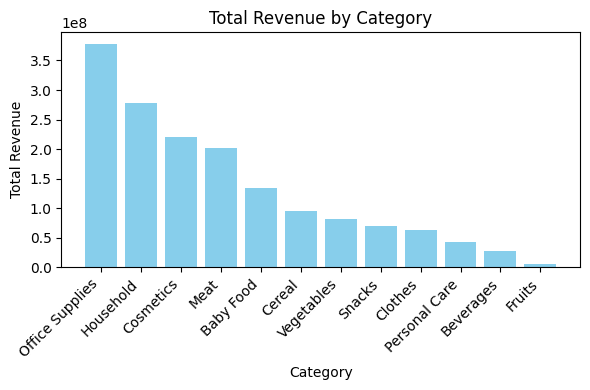

In [ ]:
Category_revenue = join_product.groupby("Category")["Total Revenue"].sum().nlargest(12)

plt.figure(figsize=(6, 4))
plt.bar(Category_revenue.index, Category_revenue.values, color="skyblue")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Найбільш прибутковими є категорії товарів для Офісу, Дому та Косметика, найменш - Фрукти

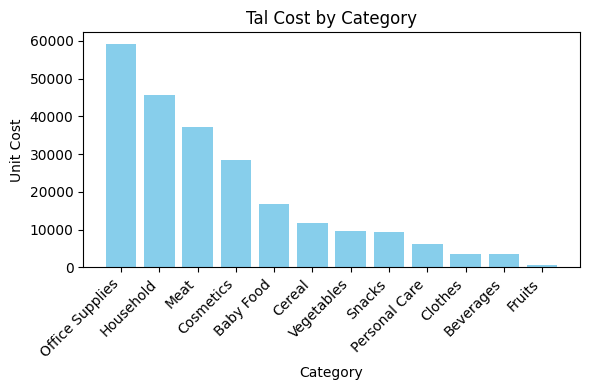

In [ ]:
Category_cost = join_product.groupby("Category")["Unit Cost"].sum().nlargest(12)

plt.figure(figsize=(6, 4))
plt.bar(Category_cost.index, Category_cost.values, color="skyblue")
plt.xlabel("Category")
plt.ylabel("Unit Cost")
plt.title("Tal Cost by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Найбільші зігільні витрати мають товари для Офісу, Дому та М'ясні вироби, найменші - Фрукти

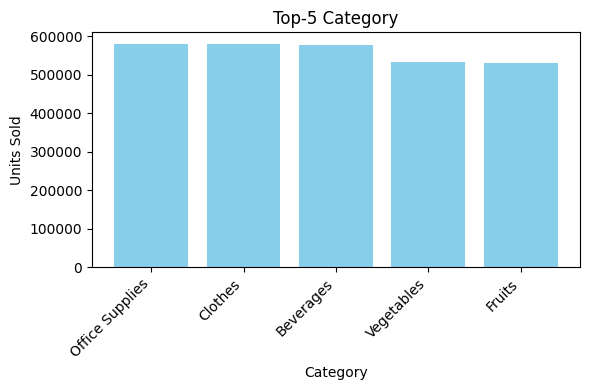

In [ ]:
Category_units_sold = join_product.groupby("Category")["Units Sold"].sum().nlargest(5)

plt.figure(figsize=(6, 4))
plt.bar(Category_units_sold.index, Category_units_sold.values, color="skyblue")
plt.xlabel("Category")
plt.ylabel("Units Sold")
plt.title("Top-5 Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Найпопулярнішими за кільеістб замовлень є Товари для офісу, Одяг, Напої, Овочі, Фрукти

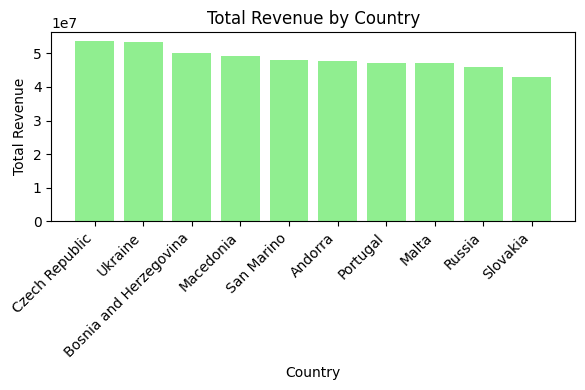

In [ ]:
Country_revenue = join_product.groupby("Country")["Total Revenue"].sum().nlargest(10)

plt.figure(figsize=(6, 4))
plt.bar(Country_revenue.index, Country_revenue.values, color="lightgreen")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
Country_revenue = join_product.groupby("Country")["Total Revenue"].sum().nsmallest(10)
print(Country_revenue)

Country
Monaco            13828738.16
Netherlands       20860788.79
Georgia           22802195.66
Estonia           23410001.79
Iceland           25570227.40
Belgium           25852572.30
Finland           26027948.98
Spain             26380296.23
United Kingdom    26654989.47
Denmark           26968532.52
Name: Total Revenue, dtype: float64


Найбільше доходу приносять країни Греція, Україна, Боснія та Герцеговина найменш - Монако, Нідерланди, Грузія

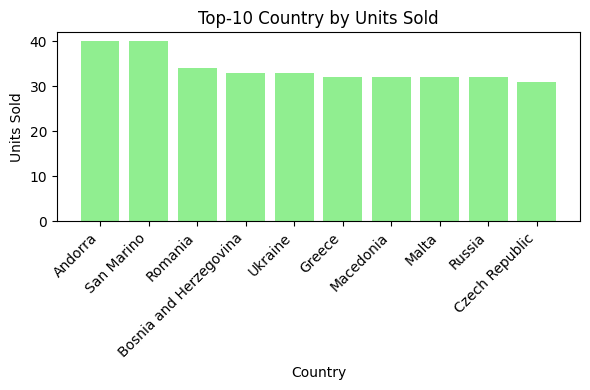

In [ ]:
Country_units_sold = join_product.groupby("Country")["Units Sold"].size().nlargest(10)

plt.figure(figsize=(6, 4))
plt.bar(Country_units_sold.index, Country_units_sold.values, color="lightgreen")
plt.xlabel("Country")
plt.ylabel("Units Sold")
plt.title("Top-10 Country by Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
Country_units_sold = join_product.groupby("Country")["Units Sold"].size().nsmallest()
print(Country_units_sold)

Country
Monaco     13
Croatia    17
Albania    21
Estonia    23
Finland    23
Name: Units Sold, dtype: int64


За кількістю замовлень лідером є Андора, Сан Марино, Румунія, найменше замовлень в Монако, Хорватії, Албанії

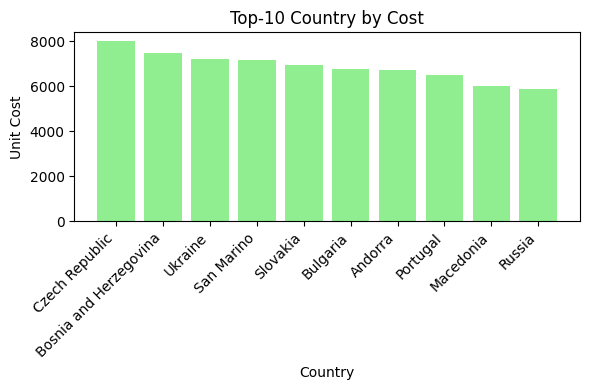

In [ ]:
Country_cost = join_product.groupby("Country")["Unit Cost"].sum().nlargest(10)

plt.figure(figsize=(6, 4))
plt.bar(Country_cost.index, Country_cost.values, color="lightgreen")
plt.xlabel("Country")
plt.ylabel("Unit Cost")
plt.title("Top-10 Country by Cost")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

За підсумком витрат лідером є Греція, Боснія та Герцеговина, Україна

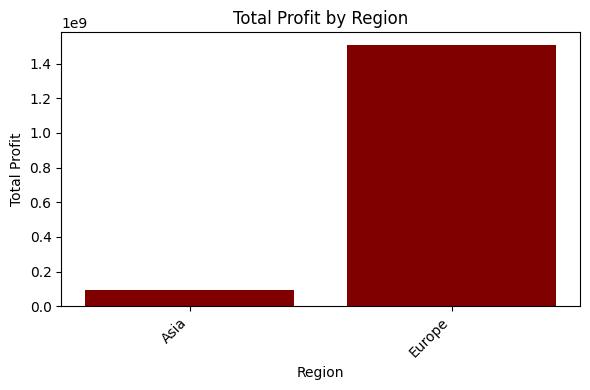

In [ ]:
Region_profit = join_product.groupby("Region")["Total Profit"].sum()

plt.figure(figsize=(6, 4))
plt.bar(Region_profit.index, Region_profit.values, color="maroon")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.title("Total Profit by Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Більше прибутку приносить регіон Європа

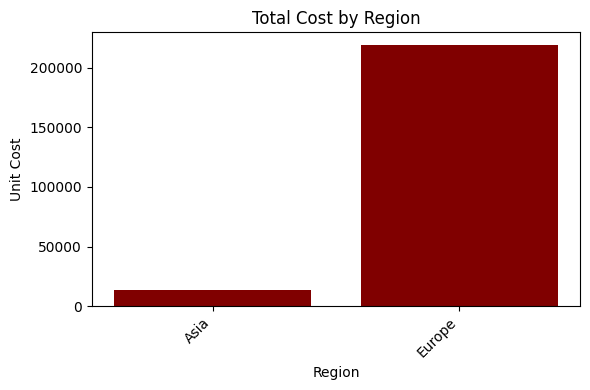

In [ ]:
Region_cost = join_product.groupby("Region")["Unit Cost"].sum()

plt.figure(figsize=(6, 4))
plt.bar(Region_cost.index, Region_cost.values, color="maroon")
plt.xlabel("Region")
plt.ylabel("Unit Cost")
plt.title("Total Cost by Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Також в Європі більше сума витрат

Sales Channel
ONLINE     625
OFFLINE    621
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7ccb0c165350>,
 [Text(-0.005547095075084541, 1.0999860134275472, 'ONLINE'),
  Text(0.005547322367470859, -1.099986012281316, 'OFFLINE')])

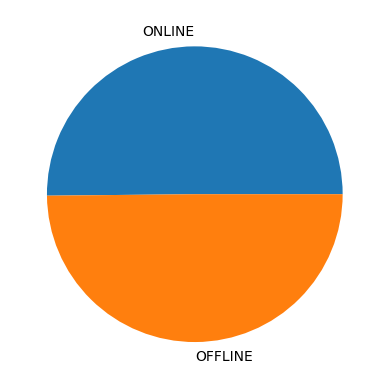

In [ ]:
cnt_channel=join_product['Sales Channel'].value_counts()
channel_counts = join_product["Sales Channel"].str.upper().value_counts()
print(channel_counts)
labels = 'ONLINE', 'OFFLINE'
sizes = [625, 621]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


Невелику перевагу мають замовлення онлайн

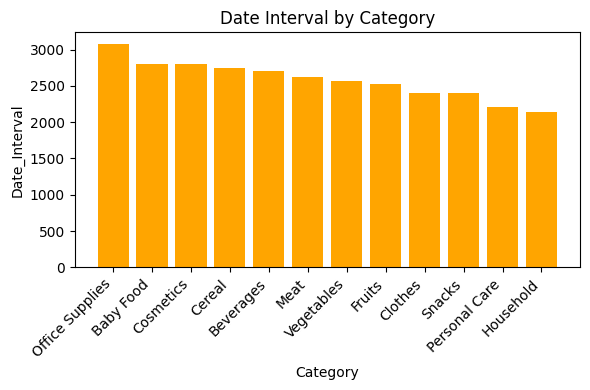

In [ ]:
join_product['Date_Interval'] = ((join_product['Date Ship']) - pd.to_datetime(join_product['Order Date'])).dt.days
Category_interval = join_product.groupby("Category")["Date_Interval"].sum().nlargest(12)

plt.figure(figsize=(6, 4))
plt.bar(Category_interval.index, Category_interval.values, color="orange")
plt.xlabel("Category")
plt.ylabel("Date_Interval")
plt.title("Date Interval by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


За інтервалом замовлення та відвантаження найдовший час потребують Офісні товари, Дитяче харчування, Косметика, найменший - Товари для дому, Гігієна, Снеки

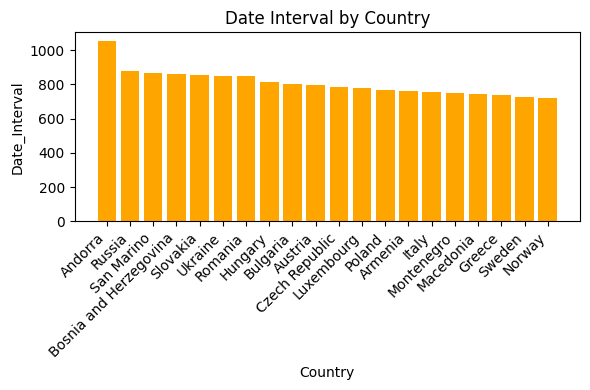

In [ ]:
Country_interval = join_product.groupby("Country")["Date_Interval"].sum().nlargest(20)

plt.figure(figsize=(6, 4))
plt.bar(Country_interval.index, Country_interval.values, color="orange")
plt.xlabel("Country")
plt.ylabel("Date_Interval")
plt.title("Date Interval by Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
Country_interval = join_product.groupby("Country")["Date_Interval"].sum().nsmallest(5)
print(Country_interval)

Country
Croatia           312
Monaco            349
United Kingdom    423
Estonia           472
Denmark           512
Name: Date_Interval, dtype: int64


По країнах найдовший інтервал мають Андора, Сан Маріно, Боснія та Герцеговина, найменший - Хорватія, Монако, США

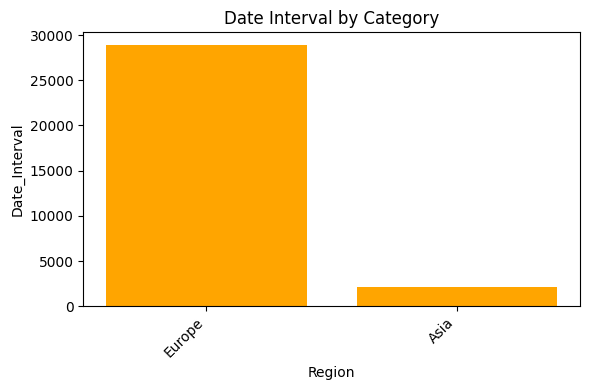

In [ ]:
Region_interval = join_product.groupby("Region")["Date_Interval"].sum().nlargest(2)

plt.figure(figsize=(6, 4))
plt.bar(Region_interval.index, Region_interval.values, color="orange")
plt.xlabel("Region")
plt.ylabel("Date_Interval")
plt.title("Date Interval by Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

 В Європі інтервал між замовленням та відвантаженням більший

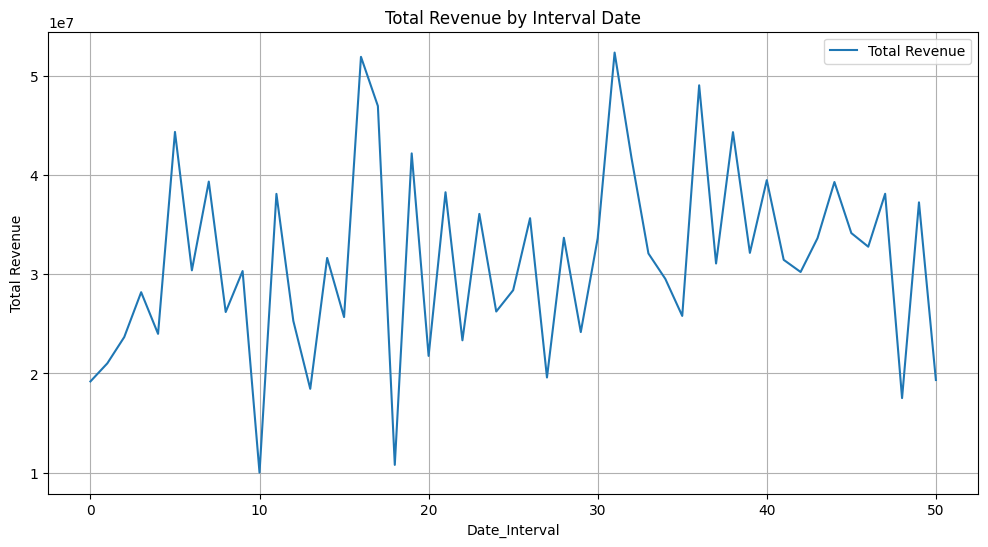

In [ ]:
# Analyze sales trends over time
revenue_interval = join_product.groupby("Date_Interval")["Total Revenue"].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(revenue_interval.index, revenue_interval.values, label="Total Revenue")
plt.xlabel("Date_Interval")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Interval Date")
plt.legend()
plt.grid(True)
plt.show()


Дохід більше коли інтервал часу складає приблизно 15 або 30-35 днів

In [ ]:
join_product['Year_Month'] = join_product['Order Date'].dt.to_period('M')
join_product["Year_Month"] = join_product["Year_Month"].dt.to_timestamp()
grouped_data = join_product.groupby('Year_Month')['Total Revenue'].sum().reset_index()
category_data = join_product.groupby(['Year_Month', 'Category'])['Total Revenue'].sum().reset_index()
last_two_year = category_data[category_data['Year_Month'].dt.year >= 2016]

print(last_two_year)

    Year_Month         Category  Total Revenue
608 2016-01-01        Baby Food     1111489.12
609 2016-01-01        Beverages      230559.55
610 2016-01-01          Clothes     2415197.28
611 2016-01-01           Fruits       69042.00
612 2016-01-01        Household     3424215.48
..         ...              ...            ...
757 2017-07-01        Household     1821704.02
758 2017-07-01  Office Supplies     7714884.87
759 2017-07-01    Personal Care       98484.65
760 2017-07-01           Snacks     1793120.16
761 2017-07-01       Vegetables     1485292.46

[154 rows x 3 columns]


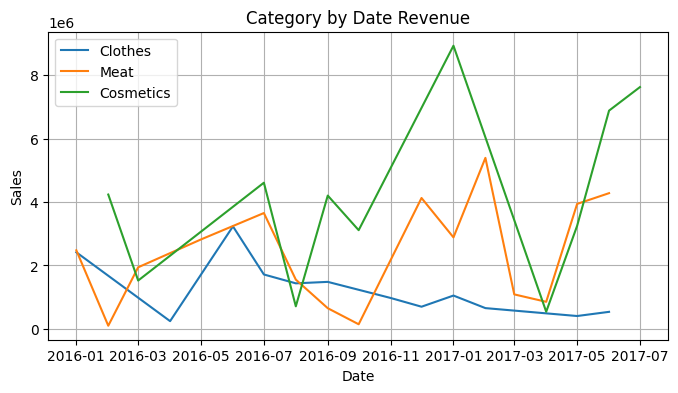

In [ ]:
plt.figure(figsize=(8, 4))
categorys = ["Clothes", "Meat", "Cosmetics"]

for Category in categorys:
    category_data = last_two_year[last_two_year["Category"] == Category]
    plt.plot(category_data["Year_Month"], category_data["Total Revenue"], label=Category)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Category by Date Revenue")
plt.legend()
plt.grid(True)
plt.show()


Дохід у розрізі місяців за останні два роки збільшився на Ксметику, М'ясні вироби та не дуже значно на одяг

In [ ]:
country_data = join_product.groupby(['Year_Month', 'Country'])['Total Revenue'].sum().reset_index()
last_two_years = country_data[country_data['Year_Month'].dt.year >= 2016]

print(last_two_years)

     Year_Month      Country  Total Revenue
844  2016-01-01      Albania      938278.08
845  2016-01-01      Belarus      350934.00
846  2016-01-01      Belgium     5904521.07
847  2016-01-01      Estonia      781024.16
848  2016-01-01      Finland         503.82
...         ...          ...            ...
1059 2017-07-01       Russia       48115.44
1060 2017-07-01   San Marino      381600.84
1061 2017-07-01        Spain     2889418.77
1062 2017-07-01       Sweden     3785714.80
1063 2017-07-01  Switzerland     3843862.40

[220 rows x 3 columns]


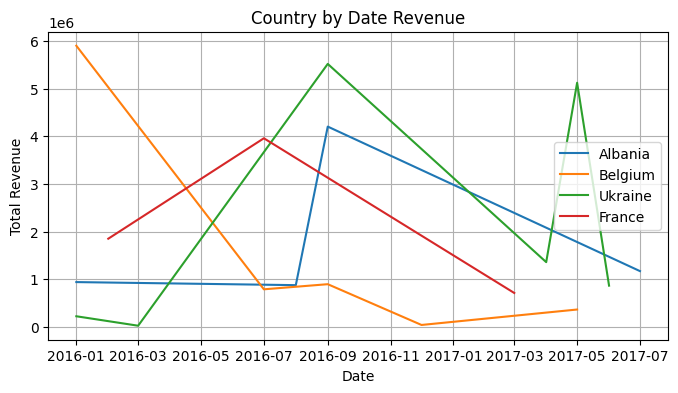

In [ ]:
plt.figure(figsize=(8, 4))
countrys = ["Albania", "Belgium", "Ukraine", "France"]

for Country in countrys:
    country_data = last_two_years[last_two_years['Country']==Country]
    plt.plot(country_data["Year_Month"], country_data["Total Revenue"], label=Country)

plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Country by Date Revenue")
plt.legend()
plt.grid(True)
plt.show()


По країнах в цілому дохід зменшився за останні два роки, зростання відмічається в Бельгії

In [ ]:
region_data = join_product.groupby(['Year_Month', 'Region'])['Total Revenue'].sum().reset_index()
last_two_yearss = region_data[region_data['Year_Month'].dt.year >= 2016]

print(last_two_yearss)

    Year_Month  Region  Total Revenue
114 2016-01-01  Europe    16365750.62
115 2016-02-01  Europe    11244644.13
116 2016-03-01    Asia     1981439.40
117 2016-03-01  Europe    11300999.46
118 2016-04-01  Europe     5904818.14
119 2016-05-01    Asia     1406875.92
120 2016-05-01  Europe    12094313.89
121 2016-06-01  Europe    13558548.06
122 2016-07-01  Europe    32774910.45
123 2016-08-01  Europe    20769776.86
124 2016-09-01  Europe    17442612.95
125 2016-10-01    Asia      144286.38
126 2016-10-01  Europe     6840299.02
127 2016-11-01    Asia     1228440.40
128 2016-11-01  Europe    13147450.76
129 2016-12-01    Asia     1482777.88
130 2016-12-01  Europe    13590145.53
131 2017-01-01    Asia     1020839.55
132 2017-01-01  Europe    15671418.84
133 2017-02-01    Asia     1084282.26
134 2017-02-01  Europe    19666930.06
135 2017-03-01  Europe    18462006.30
136 2017-04-01  Europe    14397482.38
137 2017-05-01  Europe    18808310.00
138 2017-06-01    Asia     5428247.73
139 2017-06-

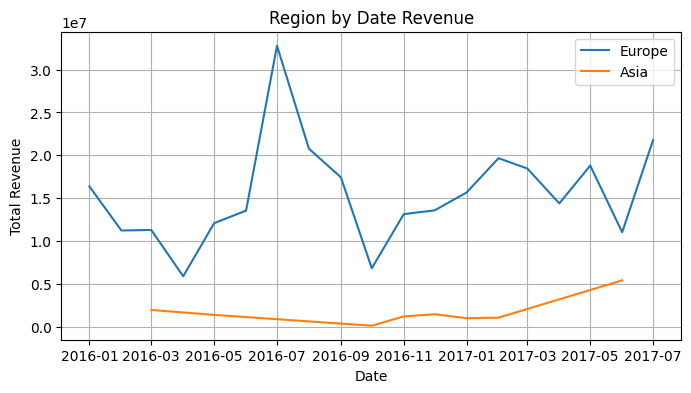

In [ ]:
plt.figure(figsize=(8, 4))
regions = ["Europe", "Asia"]

for Region in regions:
    region_data = last_two_yearss[last_two_yearss['Region']==Region]
    plt.plot(region_data["Year_Month"], region_data["Total Revenue"], label=Region)

plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.title("Region by Date Revenue")
plt.legend()
plt.grid(True)
plt.show()

По регіонам за останні два роки дохід росте в Європі більше ніж в Азії

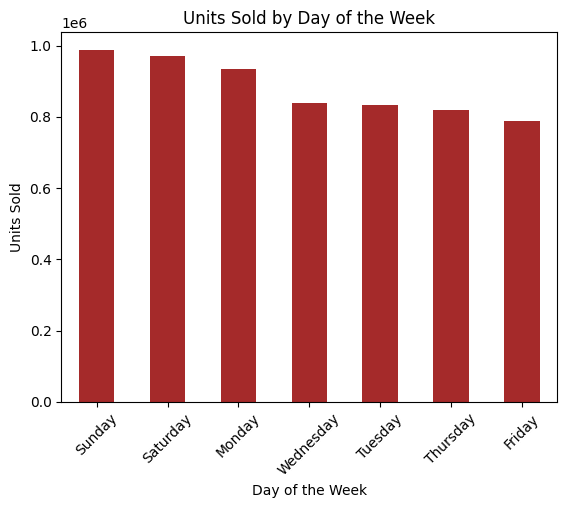

In [ ]:
join_product["day_of_week"] = join_product["Order Date"].dt.day_name()
day_of_week_units_sold = join_product.groupby("day_of_week")["Units Sold"].sum().nlargest(7)

day_of_week_units_sold.plot(kind="bar", color="brown",
    xlabel="Day of the Week",
    ylabel="Units Sold",
    title="Units Sold by Day of the Week")
plt.xticks(rotation=45)
plt.show()

За днями тижня більша кількість замовлень у вихідні Субота, Неділя, а  з Понеділка активність спадає